In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import pandas as pd

from collections import Counter
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
import time
%matplotlib inline

sys.path.insert(0,os.path.abspath(".."))
from utils import label_map_util
from utils import visualization_utils as vis_util

MODEL_NAME = 'faster_rcnn_resnet101_coco_11_06_2017'

PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')
PATH_TO_TEST_IMAGES_DIR = 'test_images'
IMAGE_SIZE = (12, 30)

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=90, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    im_width, im_height = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

person_cafe.jpg 12.12625 seconds


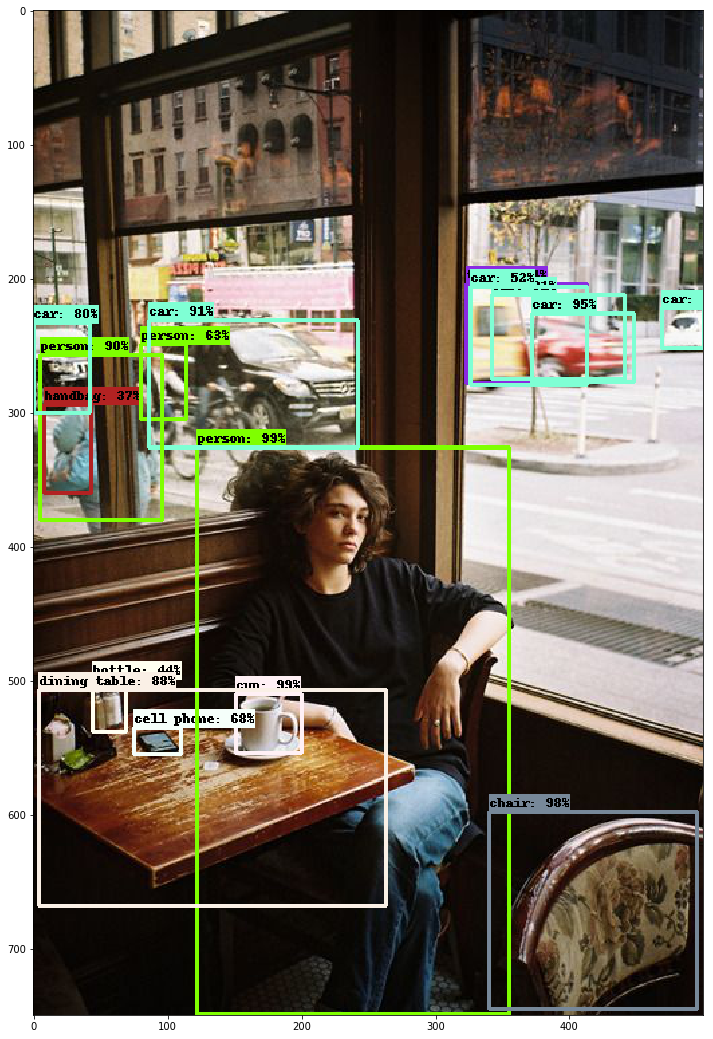

In [2]:
scores = None
classes = None

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in  os.listdir(PATH_TO_TEST_IMAGES_DIR):
            start = time.time()
            image = Image.open(os.path.join(PATH_TO_TEST_IMAGES_DIR, image_path))
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            
            (boxes, scores, classes, num_detections) = sess.run([boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
               
            print(image_path, str(time.time()-start)[:-10],'seconds')
            
            vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=3,
                max_boxes_to_draw=20,
                min_score_thresh=0.3)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)